## Topics

* **Assumpitons of linear regression**
    * Linear relationship b/w dependent & independent variables
    * Mean of residuals = Zero
    * Normality of Residuals
    * No or little multicollinearity
        * Corelation matrix
        * Vairance Inflation Matrix (V.I.F.)
    * Homoscedasticity
    * No auto-correlation

* **Simple Linear Regression**
    * Ordinary Least Square
    * Model Performance
        * Mean Square error
        * Coefficcient of determination($R^2$)

## Simple Linear Regression
              
$$ y=\beta_0 + \beta_1 x $$
where,\
x  = input training data\
y  = labels to the data

It is the best fit line that used to predict the value of y for a given value of x. Our aim is to find the best  β0  and  β1  values from this regression model.

$\beta_0$  = intercept\
$\beta_1$ = coefficient of x

### Error or Residual:
Error = Actual($y_i$) - Predicted($\hat{y}_i)$

### Mean Square Error(MSE):
$$MSE = \frac{1}{m} \sum_{i=1}^{m} (y_i - \hat{y}_i)^2 $$

### Cost function:
$$L(y, \hat{y}) = \frac{1}{m} \sum_{i=1}^{m} (y_i - \hat{y}_i)^2 $$ 

In [1]:
import pandas as pd
import numpy as np

#### Read the dataset

In [ ]:
df = pd.read_csv("auto_mpg.csv")

In [ ]:
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130.0,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,1,ford torino


Attribute/Column Information:

    1. mpg(mile per gallon):           continuous
    2. cylinders:     multi-valued discrete
    3. displacement:  continuous
    4. horsepower:    continuous
    5. weight:        continuous
    6. acceleration:  continuous
    7. model year:    multi-valued discrete
    8. origin:        multi-valued discrete
    9. car name:      string (unique for each instance)

In [ ]:
df['cylinders'].unique()

array([8, 4, 6, 3, 5], dtype=int64)

### Different types of data
    1. Ordinal - cylinders
    2. Nominal - origin, model year
    3. Continuous - 'cylinders', 'displacement', 'horsepower', 'weight', 'acceleration'

Create dummy variables for the nominal data for linear regression

In [ ]:
# one hot encode categorical variables Fuel Type using pandas getdummies

ohe_model_yr = pd.get_dummies(df['model year'],prefix='yr')
ohe_origin = pd.get_dummies(df['origin'],prefix='origin')

# concat the ohe_fuel dummies with original dataframe X
df = pd.concat([df, ohe_model_yr, ohe_origin], axis=1)


# drop the column Fuel Type from original dataframe X
df.drop(columns=['model year', 'origin'],inplace=True)

df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,car name,yr_70,yr_71,yr_72,...,yr_76,yr_77,yr_78,yr_79,yr_80,yr_81,yr_82,origin_1,origin_2,origin_3
0,18.0,8,307.0,130.0,3504,12.0,chevrolet chevelle malibu,1,0,0,...,0,0,0,0,0,0,0,1,0,0
1,15.0,8,350.0,165.0,3693,11.5,buick skylark 320,1,0,0,...,0,0,0,0,0,0,0,1,0,0
2,18.0,8,318.0,150.0,3436,11.0,plymouth satellite,1,0,0,...,0,0,0,0,0,0,0,1,0,0
3,16.0,8,304.0,150.0,3433,12.0,amc rebel sst,1,0,0,...,0,0,0,0,0,0,0,1,0,0
4,17.0,8,302.0,140.0,3449,10.5,ford torino,1,0,0,...,0,0,0,0,0,0,0,1,0,0


In [ ]:
df.shape

(398, 23)

In [ ]:
df.isnull().sum(axis=0).sort_values(ascending=False).head(4)

horsepower    6
mpg           0
yr_75         0
origin_2      0
dtype: int64

In [ ]:
df['car name'].nunique()

305

In [ ]:
X = df.drop(['mpg','car name'], axis=1)
y = df.mpg

In [ ]:
from sklearn.model_selection import train_test_split

# split the data in train and test sets
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.30, random_state=123)
print(X.shape)
print(X_train.shape)
print(X_test.shape)

(398, 21)
(278, 21)
(120, 21)


In [ ]:
X_train.isnull().sum().sort_values(ascending=False).head(4)

horsepower    4
cylinders     0
yr_76         0
origin_2      0
dtype: int64

In [ ]:
X_test.isnull().sum().sort_values(ascending=False).head(4)

horsepower    2
cylinders     0
yr_76         0
origin_2      0
dtype: int64

In [ ]:
X_train.describe()

,cylinders,displacement,horsepower,weight,acceleration,yr_70,yr_71,yr_72,yr_73,yr_74,...,yr_76,yr_77,yr_78,yr_79,yr_80,yr_81,yr_82,origin_1,origin_2,origin_3
count,278.000000,278.000000,274.000000,278.000000,278.000000,278.000000,278.000000,278.000000,278.000000,278.000000,...,278.000000,278.000000,278.000000,278.000000,278.000000,278.000000,278.000000,278.000000,278.000000,278.000000
mean,5.442446,192.739209,104.861314,2976.338129,15.581655,0.064748,0.061151,0.082734,0.111511,0.075540,...,0.086331,0.061151,0.089928,0.064748,0.089928,0.071942,0.079137,0.633094,0.154676,0.212230
std,1.710637,103.408104,38.418399,853.588281,2.698252,0.246525,0.240039,0.275976,0.315331,0.264737,...,0.281359,0.240039,0.286595,0.246525,0.286595,0.258859,0.270439,0.482830,0.362248,0.409624
min,3.000000,68.000000,46.000000,1649.000000,8.500000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.000000,104.250000,77.250000,2221.500000,13.725000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,4.000000,151.000000,92.000000,2764.500000,15.500000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
75%,8.000000,260.000000,128.000000,3573.000000,17.075000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
max,8.000000,455.000000,230.000000,5140.000000,24.600000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### Impute null values with the median value
Always impute the test set missing values from the **training set mean/median** to avoid data leakage

In [ ]:
X_train['horsepower'].fillna(X_train.horsepower.median(), inplace=True)
X_test['horsepower'].fillna(X_train.horsepower.median(), inplace=True)

### Standardize the data

* StadardScaler : Standardize features by removing the mean and scaling to unit variance.\
    The standard score of a sample $x_i$ is calculated as:
    $$ z_i = \frac{x_i-\mu}{\sigma} $$
    For details - https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html
* MinMaxScaler : Transform features by scaling each feature to a given range.\
    $$ \text{X_std} = \frac{X - X.min}{X.max - X.min} $$
    For details - https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MinMaxScaler.html

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train_std = sc.fit_transform(X_train)
X_test_std = sc.transform(X_test)

In [ ]:
X_train_std = pd.DataFrame(X_train_std, columns= X_train.columns, index = X_train.index)
X_test_std = pd.DataFrame(X_test_std, columns= X_test.columns, index=X_test.index)

### Linear relationship b/w dependent & independent variables

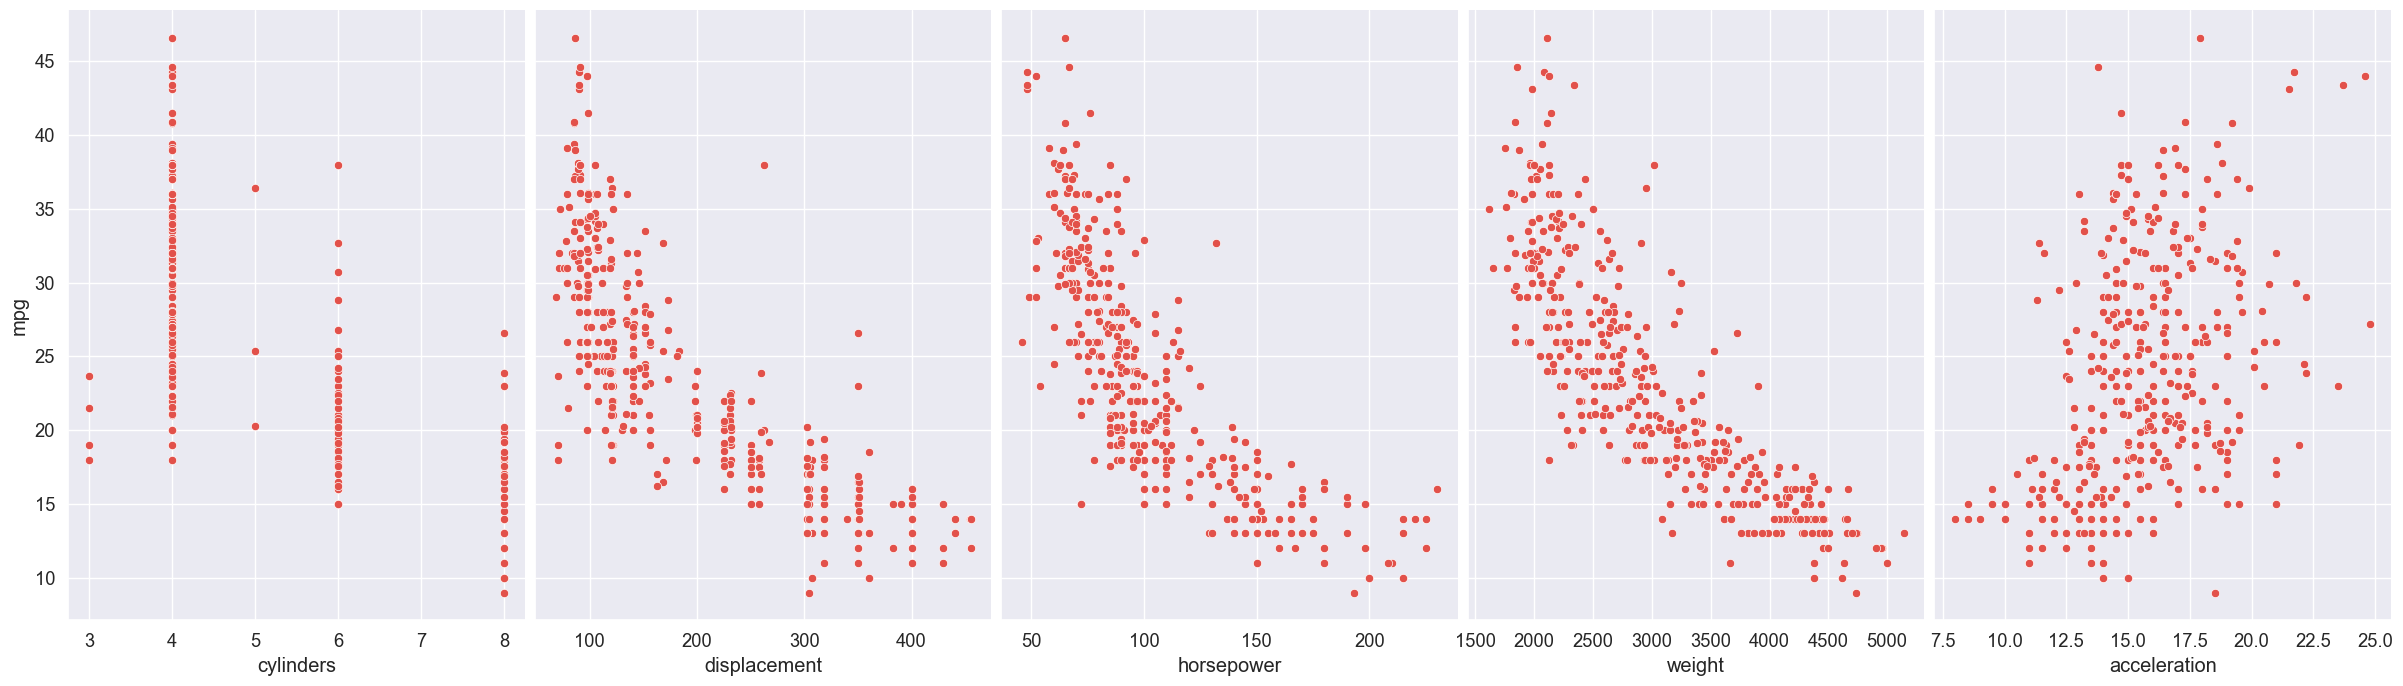

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.set(context="notebook", palette="Spectral", style = 'darkgrid' ,font_scale = 1.2)
import warnings
warnings.filterwarnings("ignore")

p = sns.pairplot(df, x_vars=['cylinders', 'displacement', 'horsepower', 'weight', 'acceleration'], 
                 y_vars='mpg', size=7, aspect=0.7)

**Conclusion**: In the above plots, we can see there is a linear relationship b/w independent continuous(displacement, horsepower, weight, acceleration) & depenedent(mpg) variable.

In [ ]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn import linear_model

lr = linear_model.LinearRegression()
lr.fit(X_train_std,y_train)
y_pred = lr.predict(X_train_std)

### Calculate  R2 , Adjusted  R2 , Regression Coefficients, Intercept

In [ ]:
#Print the R2 score and Adjusted R2 Score
print("R squared: {}".format(r2_score(y_train,y_pred)))
#display adjusted R-squared
print("Adjusted R squared: ", 1 - (1-lr.score(X_train_std, y_train))*(len(y_train)-1)/(len(y_train)-X_train_std.shape[1]-1))

R squared: 0.8644229803850344
Adjusted R squared:  0.8533014279947443


#### The adjusted R-squared is a modified version of R-squared that accounts for predictors that are not significant in a regression model. In other words, the adjusted R-squared shows whether adding additional predictors improve a regression model or not.

In [ ]:
# print the intercept and the coefficients of the model
print("Intercept for linear regression model is: ", lr.intercept_)
print("Coefficients for linear regression model are: ", lr.coef_)

Intercept for linear regression model is:  23.552877697841726
Coefficients for linear regression model are:  [-0.33712746  2.12949292 -0.21849858 -5.68814014  0.45494269 -0.88387583
 -0.54098459 -0.87971037 -1.29928629 -0.25709989 -0.5168226  -0.43503037
  0.03954414  0.05198339  0.59389257  1.69162825  0.99844196  1.4816452
 -0.91925175  0.65256754  0.50644201]


### Ordinary least Square
To check the significance of coefficients

In [ ]:
import statsmodels.api as sm
from scipy import stats

X2 = sm.add_constant(X_train_std)
est = sm.OLS(y_train, X2)
est2 = est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:                    mpg   R-squared:                       0.864
Model:                            OLS   Adj. R-squared:                  0.854
Method:                 Least Squares   F-statistic:                     86.58
Date:                Wed, 28 Dec 2022   Prob (F-statistic):          3.27e-100
Time:                        01:38:23   Log-Likelihood:                -693.41
No. Observations:                 278   AIC:                             1427.
Df Residuals:                     258   BIC:                             1499.
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const           23.5529      0.182    129.073   

In the above summary, there are few coefficients with p value > 0.05 & in the notes we can see there is  indication of multicollinearity.

### Mean of residuals = Zero

In [ ]:
residuals = y_train.values-y_pred
mean_residuals = np.mean(residuals)
print("Mean of Residuals {}".format(mean_residuals))

Mean of Residuals 5.303511426986359e-16


### Normality of Residuals

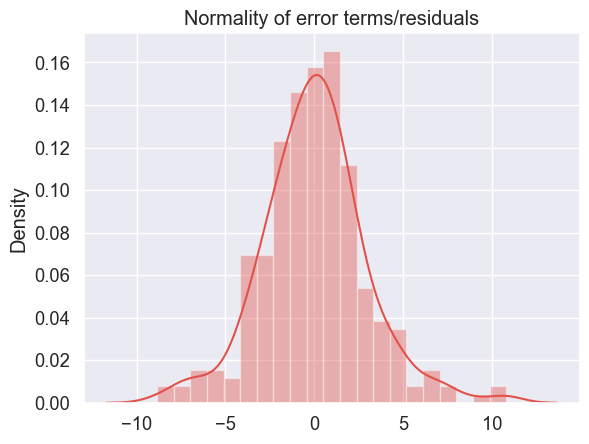

In [ ]:
p = sns.distplot(residuals,kde=True)
p = plt.title('Normality of error terms/residuals')

### Correlation Matrix

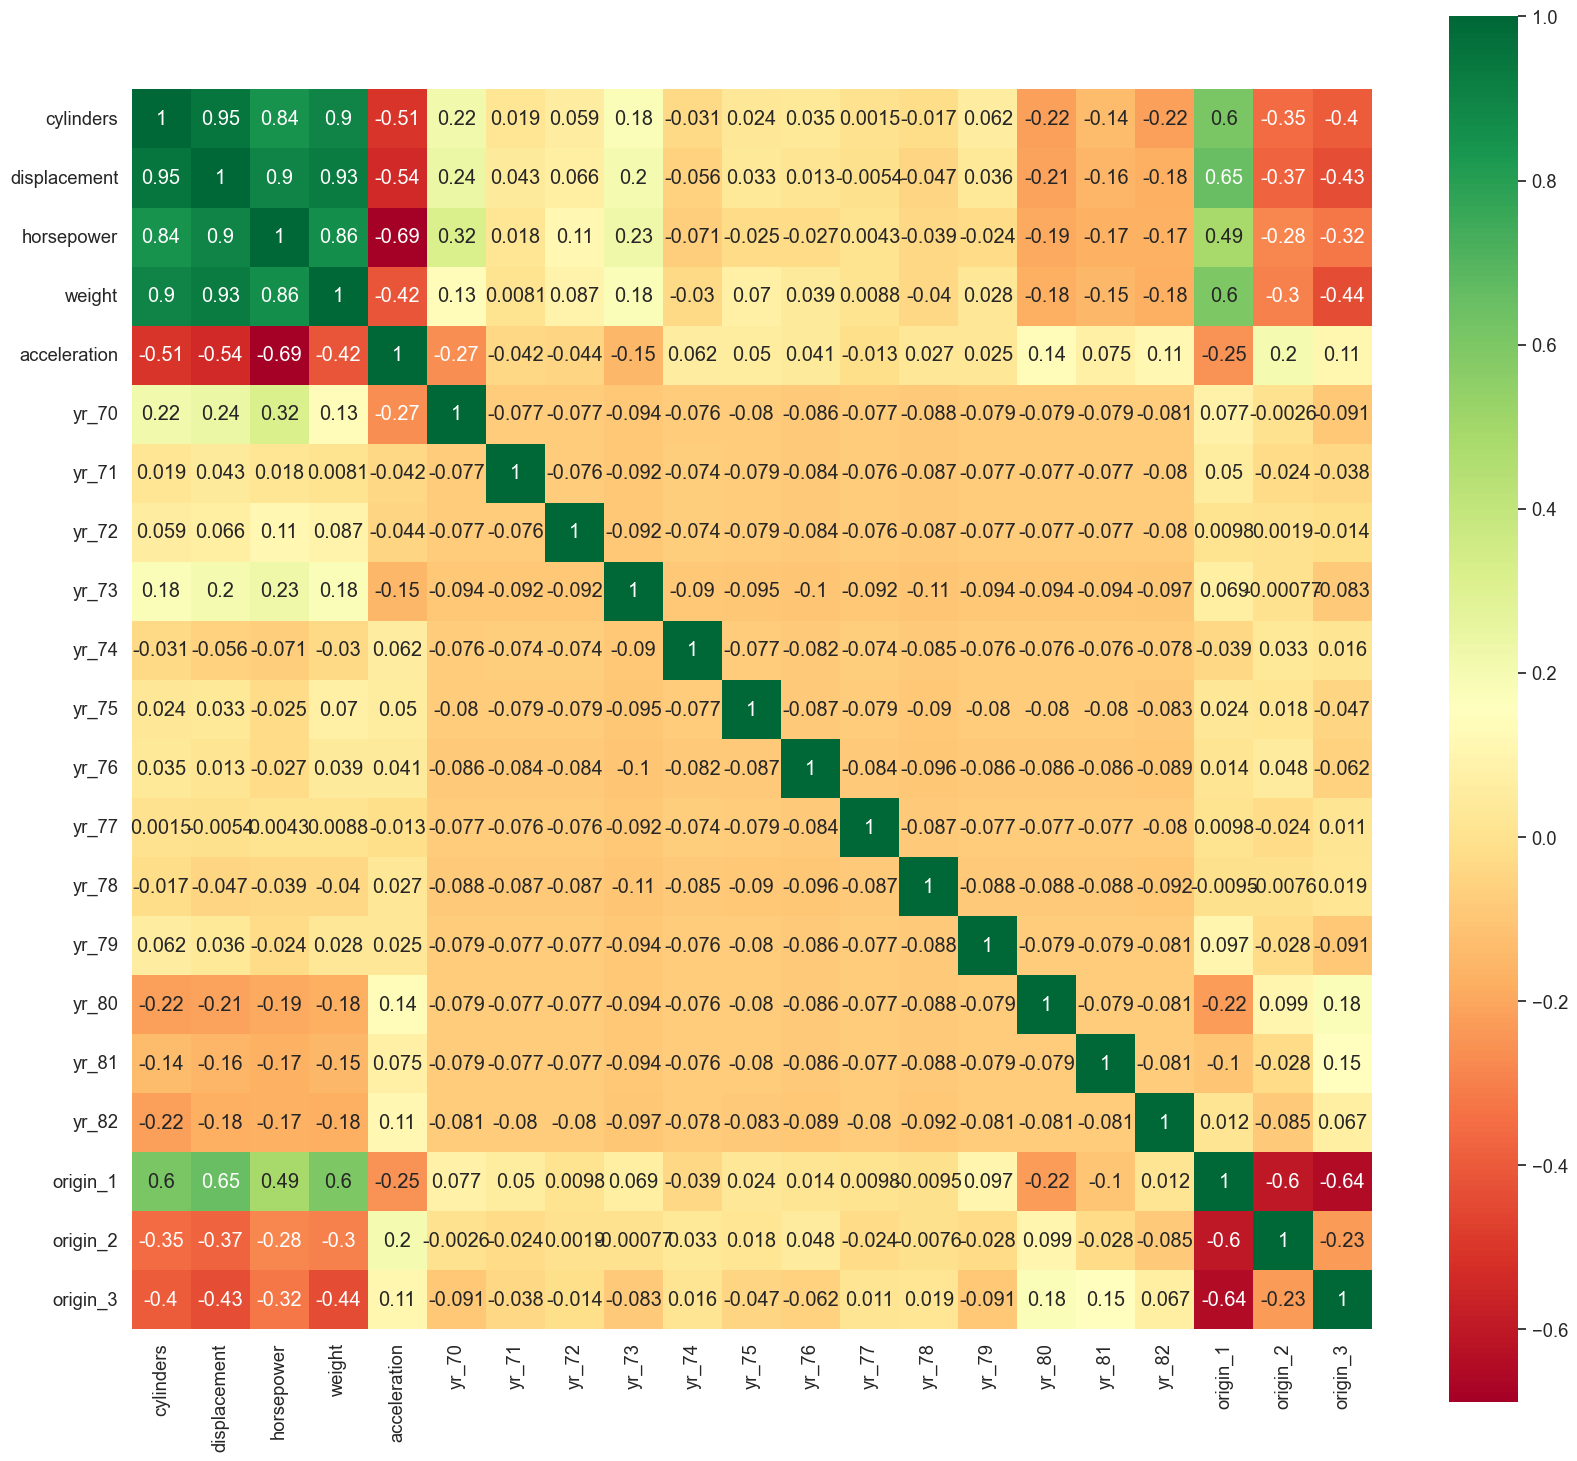

In [ ]:
plt.figure(figsize=(20, 18)) 
p=sns.heatmap(X.corr(), annot=True,cmap='RdYlGn',square=True) 

#### Variance Inflation Factor:

$$ VIF_i = \frac{1}{1-R_i^2} $$
where  $R^2$  represents the unadjusted coefficient of determination for regressing the  $i^{th}$  independent variable on the remaining ones.
As VIF increases, the regression model will be less reliable.

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
X_new = X_train_std.copy()

def calculate_VIF_(X, thresh=10):    
    column = X.columns
    variables = np.arange(X.shape[1])
    dropped=True
    while dropped:
        dropped=False
        s = X[column[variables]].values
        VIF = [variance_inflation_factor(s, e) for e in np.arange(s.shape[1])]

        maxloc = VIF.index(max(VIF))
        if max(VIF) > thresh:
            print('dropping \'' + X[column[variables]].columns[maxloc] + '\' at index: ' + str(maxloc))
            variables = np.delete(variables, maxloc)
            dropped=True

    print('Remaining variables:')
    print(X.columns[variables])
    print(VIF)
    return X[column[variables]]
vif = calculate_VIF_(X_new, thresh=10)
vif.head()

dropping 'yr_70' at index: 5
dropping 'origin_1' at index: 17
dropping 'displacement' at index: 1
dropping 'horsepower' at index: 1
Remaining variables:
Index(['cylinders', 'weight', 'acceleration', 'yr_71', 'yr_72', 'yr_73',
       'yr_74', 'yr_75', 'yr_76', 'yr_77', 'yr_78', 'yr_79', 'yr_80', 'yr_81',
       'yr_82', 'origin_2', 'origin_3'],
      dtype='object')
[6.682532144173301, 6.011868812354412, 1.4342509871478233, 1.908197330135142, 2.1772649764488605, 2.4612975343071346, 2.1307465957099176, 1.930001874289848, 2.240445172997485, 1.9133135737422882, 2.286787393699526, 1.9396581940603106, 2.529022363452679, 2.123406054428151, 2.3717402068199034, 1.4557828765925245, 1.6639288375069168]


,cylinders,weight,acceleration,yr_71,yr_72,yr_73,yr_74,yr_75,yr_76,yr_77,yr_78,yr_79,yr_80,yr_81,yr_82,origin_2,origin_3
105,1.497785,1.968967,-0.958513,-0.255214,-0.300327,2.822719,-0.285853,-0.255214,-0.307389,-0.255214,-0.314347,-0.263117,-0.314347,-0.278423,-0.293151,-0.427760,-0.519044
5,1.497785,1.601619,-2.072349,-0.255214,-0.300327,-0.354268,-0.285853,-0.255214,-0.307389,-0.255214,-0.314347,-0.263117,-0.314347,-0.278423,-0.293151,-0.427760,-0.519044
320,-0.844742,-0.636509,-0.215956,-0.255214,-0.300327,-0.354268,-0.285853,-0.255214,-0.307389,-0.255214,-0.314347,-0.263117,3.181195,-0.278423,-0.293151,-0.427760,1.926620
260,0.326521,0.755426,1.157775,-0.255214,-0.300327,-0.354268,-0.285853,-0.255214,-0.307389,-0.255214,3.181195,-0.263117,-0.314347,-0.278423,-0.293151,-0.427760,-0.519044
19,-0.844742,-1.339518,1.826077,-0.255214,-0.300327,-0.354268,-0.285853,-0.255214,-0.307389,-0.255214,-0.314347,-0.263117,-0.314347,-0.278423,-0.293151,2.337759,-0.519044


**Conclusion**: 
* yr_70, origin_1 & displacement are the variablse which is highly correlated with the other independent variables. So we can drop these attributes from the data
* always create (n-1) dummy varibales from a variable with n classes
    * e.g. origin has 3 distinct values so create only two dummy variables, if we create the three variabes correspoding for all three classes, then one varibale can be written as linear combination of other two.

### Homoscedasticity
    1. Graphical Method
    2. Goldfeld Quandt Test

#### Graphical Method: 
Firstly do the regression analysis and then plot the error terms against the predicted values($\hat{Y_i}$) If there is a definite pattern (like linear or quadratic or funnel shaped) obtained from the scatter plot then heterosedasticity is present.

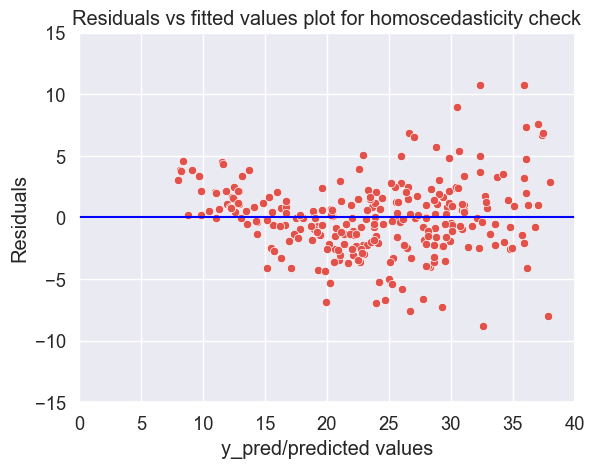

In [ ]:
%matplotlib inline
p = sns.scatterplot(y_pred,residuals)
plt.xlabel('y_pred/predicted values')
plt.ylabel('Residuals')
plt.ylim(-15,15)
plt.xlim(0,40)
p = sns.lineplot([0,40],[0,0],color='blue')
p = plt.title('Residuals vs fitted values plot for homoscedasticity check')

**Conclusion**: There is no definite pattern in the above plot, we can say there is no heterosedasticity is present

#### Goldfeld Quandt Test
    Null Hypothesis: Error terms are homoscedastic
    Alternative Hypothesis: Error terms are heteroscedastic.

In [ ]:
import statsmodels.stats.api as sms
from statsmodels.compat import lzip
name = ['F statistic', 'p-value']
test = sms.het_goldfeldquandt(residuals, X_train_std)
lzip(name, test)

[('F statistic', 1.252106783841246), ('p-value', 0.10980219456969119)]

**Conclusion**: Since p value is more than 0.05 in Goldfeld Quandt Test, we can't reject it's null hypothesis that error terms are homoscedastic.

### Autocorrelation

####  Durbin Watson test : 
The Durbin Watson (DW) statistic is a test for autocorrelation in the residuals from a statistical model or regression analysis. The Durbin-Watson statistic will always have a value ranging between 0 and 4. A value of 2.0 indicates there is no autocorrelation detected in the sample

In [ ]:
from statsmodels.stats.stattools import durbin_watson

durbin_watson(residuals)

2.010610242519155

**Conclusion**: Durbin Watson Statisitc is 2, so we can say there is no autocorrelation in the data.

### Create a new model without the variables with high vif

In [ ]:
X_new = X_train_std.drop(['yr_70', 'origin_1', 'displacement'], axis=1)

lr_new = linear_model.LinearRegression()
lr_new.fit(X_new,y_train)
y_pred_new = lr_new.predict(X_new)

#Print the R2 score and Adjusted R2 Score
print("R squared: {}".format(r2_score(y_train,y_pred)))
#display adjusted R-squared
print("Adjusted R squared: ", 1 - (1-lr_new.score(X_new, y_train))*(len(y_train)-1)/(len(y_train)-X_new.shape[1]-1))

R squared: 0.8644229803850344
Adjusted R squared:  0.8522637103955443


In [ ]:
# print the intercept and the coefficients of the model
print("Intercept for linear regression model is: ", lr_new.intercept_)
print("Coefficients for linear regression model are: ", lr_new.coef_)

Intercept for linear regression model is:  23.552877697841726
Coefficients for linear regression model are:  [ 0.54041107  0.06821852 -4.90264122  0.34140537  0.32088443  0.04511782
 -0.18964676  0.60429124  0.30098089  0.5276725   0.82603782  1.01081483
  1.40724815  2.67177148  1.83202633  2.39999494  1.18289245  1.12427976]
